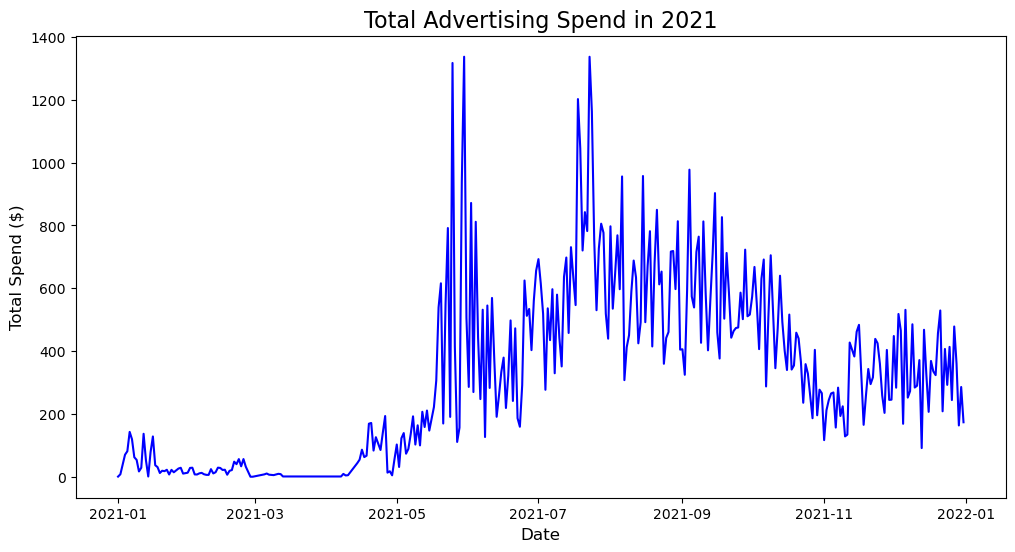

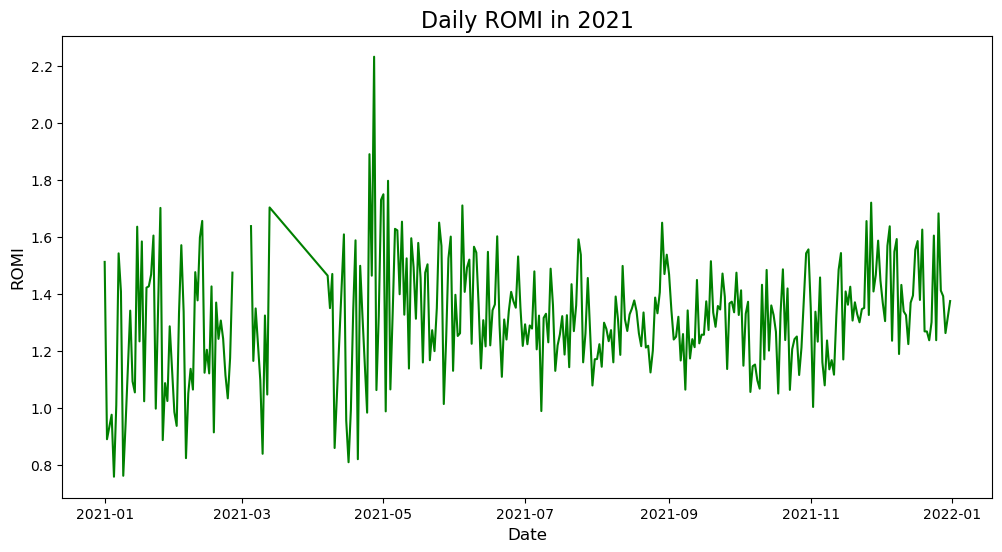

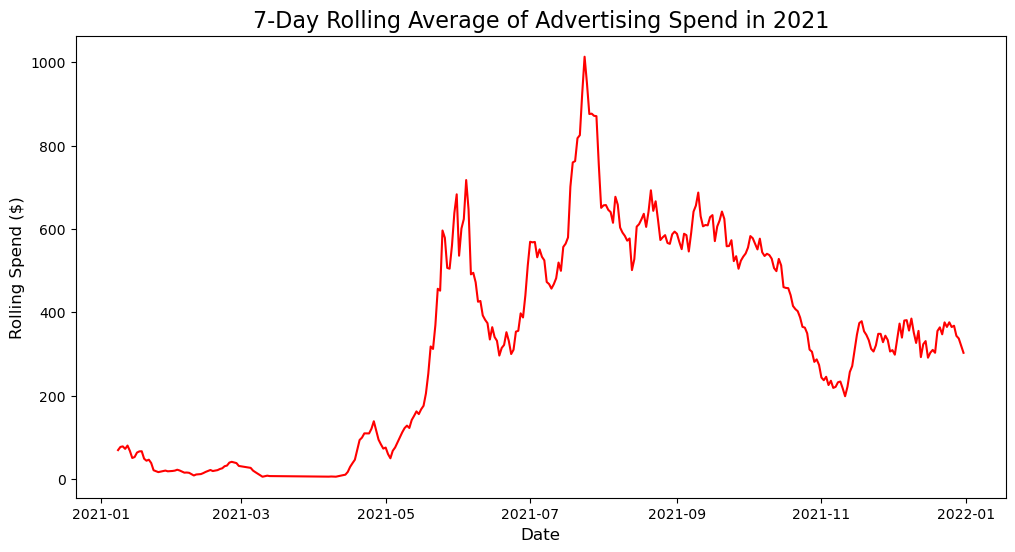

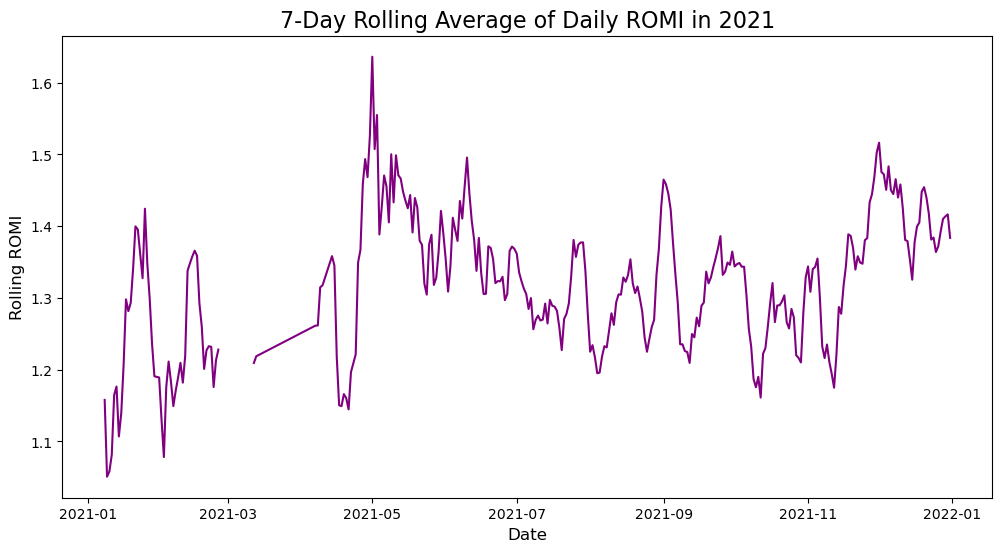

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ads_data = pd.read_csv('facebook_ads_data.csv')
ads_data['ad_date'] = pd.to_datetime(ads_data['ad_date'])
ads_data_2021 = ads_data[ads_data['ad_date'].dt.year == 2021]

# 1 :Group data by day
daily_data_2021 = ads_data_2021.groupby('ad_date').agg({
    'total_spend': 'sum',
    'romi': 'mean'
}).reset_index()

# 1 :Plot total spend in 2021
plt.figure(figsize=(12, 6))
plt.plot(daily_data_2021['ad_date'], daily_data_2021['total_spend'], label='Total Spend', color='blue')
plt.title('Total Advertising Spend in 2021', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Spend ($)', fontsize=12)
#plt.grid()
#plt.legend()
plt.show()

# 1: Plot ROMI in 2021
plt.figure(figsize=(12, 6))
plt.plot(daily_data_2021['ad_date'], daily_data_2021['romi'], label='Daily ROMI', color='green')
plt.title('Daily ROMI in 2021', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('ROMI', fontsize=12)
#plt.grid()
#plt.legend()
plt.show()

# Bonus: Apply rolling average (7-day window)
daily_data_2021['rolling_spend'] = daily_data_2021['total_spend'].rolling(window=7).mean()
daily_data_2021['rolling_romi'] = daily_data_2021['romi'].rolling(window=7).mean()

#  Bonus : Plot rolling average of total spend
plt.figure(figsize=(12, 6))
plt.plot(daily_data_2021['ad_date'], daily_data_2021['rolling_spend'], label='7-Day Rolling Spend', color='red')
plt.title('7-Day Rolling Average of Advertising Spend in 2021', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Spend ($)', fontsize=12)
#plt.grid()
#plt.legend()
plt.show()

# Bonus: Plot rolling average of ROMI
plt.figure(figsize=(12, 6))
plt.plot(daily_data_2021['ad_date'], daily_data_2021['rolling_romi'], label='7-Day Rolling ROMI', color='purple')
plt.title('7-Day Rolling Average of Daily ROMI in 2021', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling ROMI', fontsize=12)
#plt.grid()
# plt.legend()
plt.show()


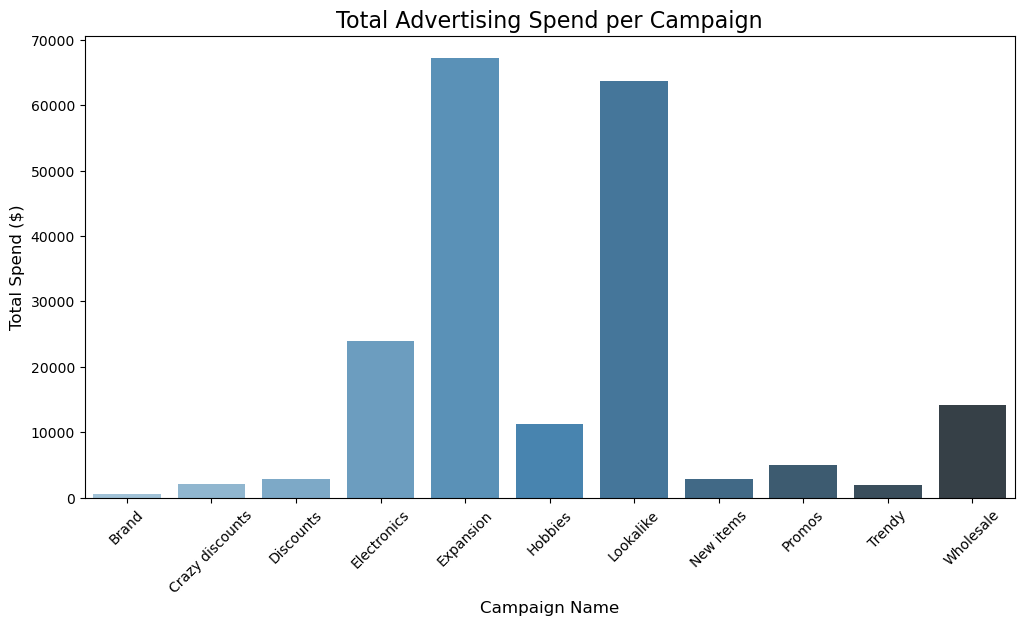

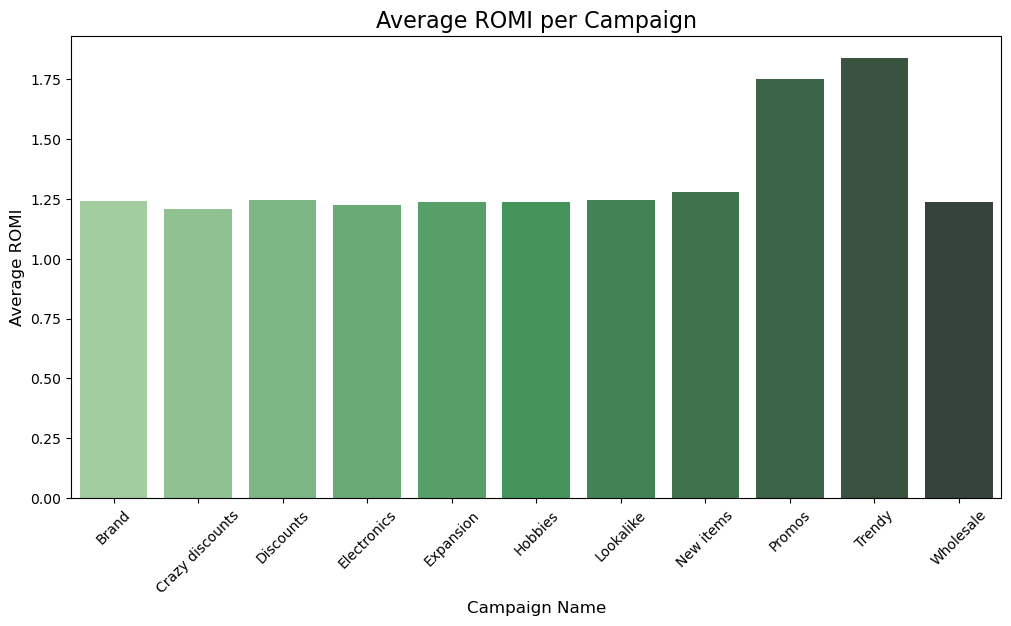

In [21]:
# 2 : Group data by campaign_name
campaign_data = ads_data.groupby('campaign_name').agg({
    'total_spend': 'sum',
    'romi': 'mean'
}).reset_index()

# 2 : Plot total spend per campaign
plt.figure(figsize=(12, 6))
sns.barplot(x='campaign_name', y='total_spend', data=campaign_data, hue='campaign_name', palette='Blues_d')
plt.title('Total Advertising Spend per Campaign', fontsize=16)
plt.xlabel('Campaign Name', fontsize=12)
plt.ylabel('Total Spend ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 2 : Plot average ROMI per campaign
plt.figure(figsize=(12, 6))
sns.barplot(x='campaign_name', y='romi', data=campaign_data, hue='campaign_name', palette='Greens_d')
plt.title('Average ROMI per Campaign', fontsize=16)
plt.xlabel('Campaign Name', fontsize=12)
plt.ylabel('Average ROMI', fontsize=12)
plt.xticks(rotation=45)
plt.show()


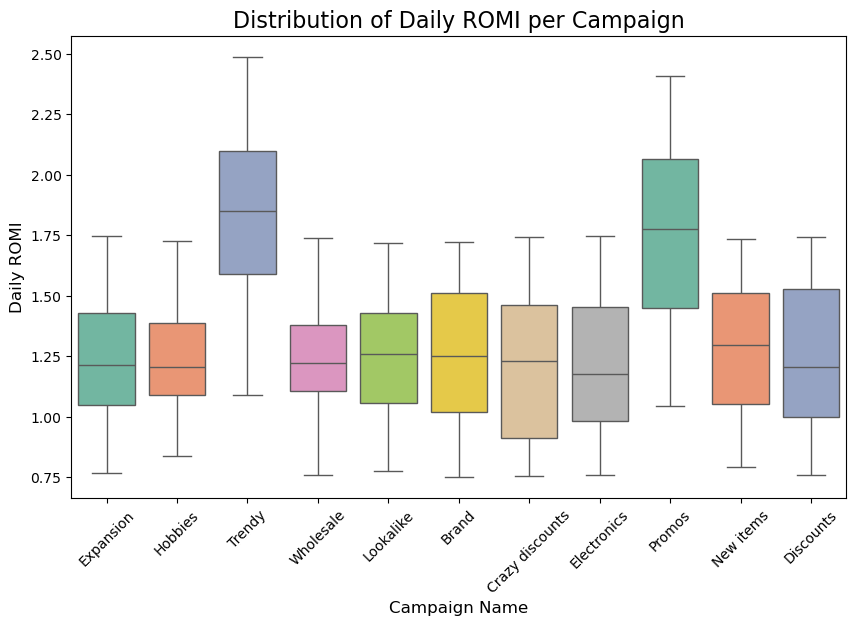

In [61]:
# 3 :  Box Plot - Distribution of Daily ROMI per Campaign
plt.figure(figsize=(10, 6))
sns.boxplot(x='campaign_name', y='romi', data=ads_data, hue='campaign_name', palette='Set2')
plt.title('Distribution of Daily ROMI per Campaign', fontsize=16)
plt.xlabel('Campaign Name', fontsize=12)
plt.ylabel('Daily ROMI', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

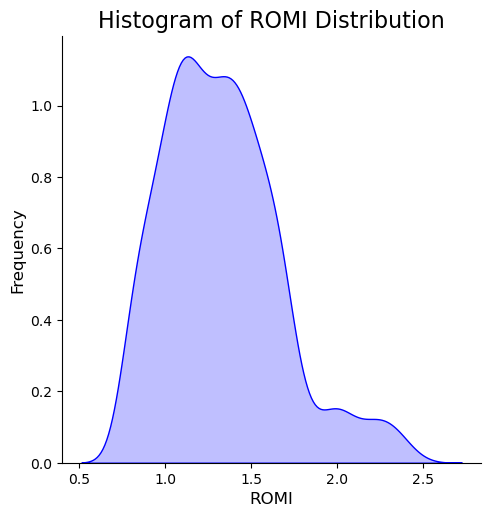

In [32]:
# 4 : Histogram of ROMI Distribution
plt.figure(figsize=(10, 6))
sns.displot(ads_data['romi'], kind='kde', fill=True, color='blue')
plt.title('Histogram of ROMI Distribution', fontsize=16)
plt.xlabel('ROMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
#ax = plt.gca()
#plt.grid()
plt.show()


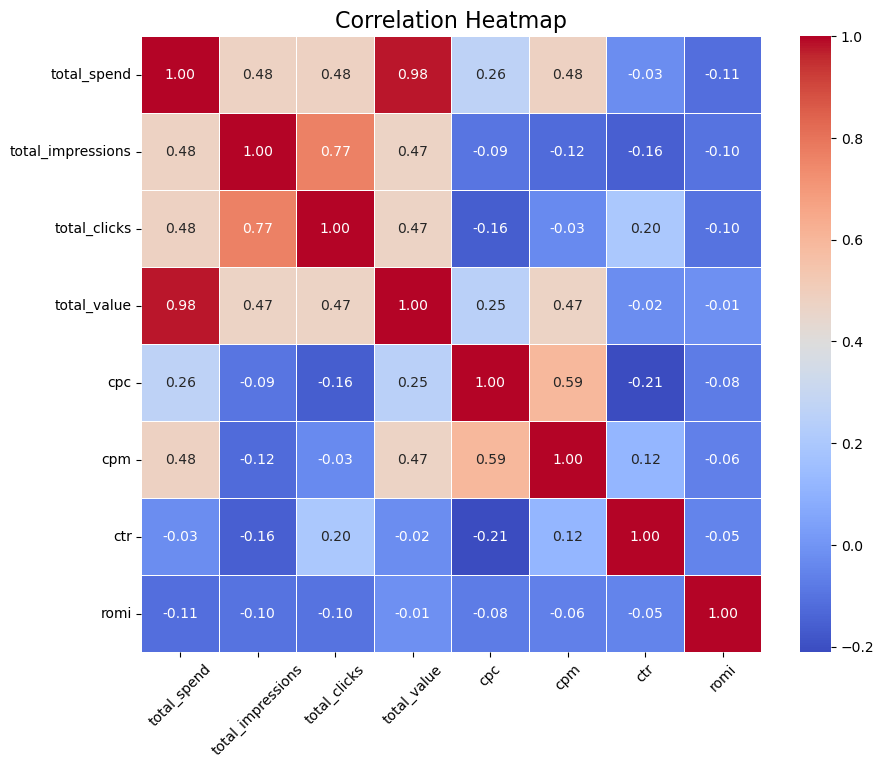

In [35]:
# 5 : Plot heatmap
numeric_data = ads_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.show()


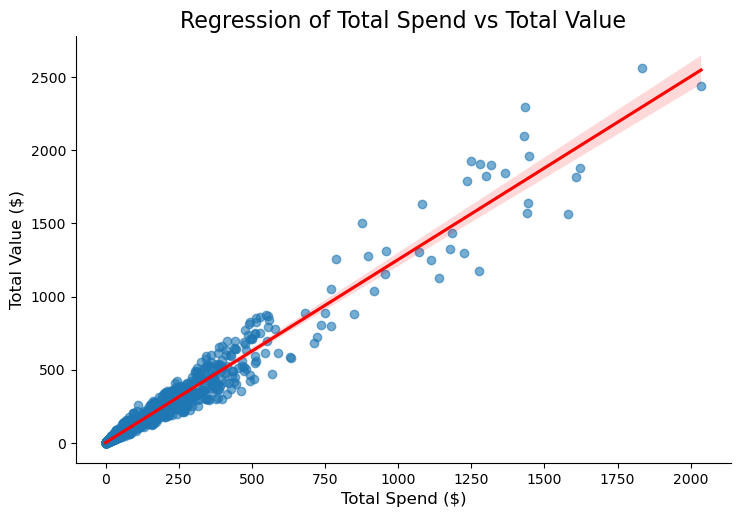

In [55]:
# 6: Scatter plot with regression line for total_spend vs total_value
sns.lmplot(x='total_spend', y='total_value', data=ads_data, height=5, aspect=1.5, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Regression of Total Spend vs Total Value', fontsize=16)
plt.xlabel('Total Spend ($)', fontsize=12)
plt.ylabel('Total Value ($)', fontsize=12)
plt.show()

